In [1]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the data
train = pd.read_csv("C:/Users/HP/Documents/data science competitions/Mushroom dataset DSG-IITR/mushroom_train.csv")
test = pd.read_csv("C:/Users/HP/Documents/data science competitions/Mushroom dataset DSG-IITR/mushroom_test.csv")

In [12]:
#overview of data
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [10]:
train.shape

(5686, 25)

In [11]:
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


### Apart from radius and weight, all other variables are qualitative in nature. 

In [13]:
# let's see if there are any null values
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### luckily, data set is free from null values making our lives easier

## Time for bivariate analysis with target variable as one of the two variables. To keep things simple and easy to understand, I will use crosstab for numerical visualization and mosaic chart for visual visaulization due to nature of target and independent variables. To aid to the information, I will use value counts.

In [23]:
### lets start with target variable itself
train['class'].value_counts()

e    2945
p    2741
Name: class, dtype: int64

#### looks like a fair mix of poisonus and edible mushrooms species, a balanced data set

In [26]:
baseline_accuracy = 2945/(2945+2741)
baseline_accuracy

0.5179387970453746

In [27]:
### analyzing cap-shape
train['cap-shape'].value_counts()

x    2578
f    2179
k     590
b     312
s      23
c       4
Name: cap-shape, dtype: int64

In [33]:
### lets have a look at the relation between target variable and cap-shape 
pd.DataFrame(pd.crosstab(train['cap-shape'],train['class']))

class,e,p
cap-shape,,
b,278,34
c,0,4
f,1094,1085
k,161,429
s,23,0
x,1389,1189


In [7]:
from statsmodels.graphics.mosaicplot import mosaic

(<matplotlib.figure.Figure at 0x1d5c0ca0390>,
 OrderedDict([(('f', 'p'),
               (0.0, 0.0, 0.49628056394548381, 0.37387507184955776)),
              (('f', 'e'),
               (0.4996028230816964,
                0.0,
                0.50039717691830354,
                0.37387507184955776)),
              (('x', 'p'),
               (0.0,
                0.37875312063004557,
                0.45967798056130454,
                0.442335904189151)),
              (('x', 'e'),
               (0.46300023969751719,
                0.37875312063004557,
                0.53699976030248275,
                0.442335904189151)),
              (('b', 'p'),
               (0.0,
                0.8259670735996844,
                0.10861231791464351,
                0.053533282430960165)),
              (('b', 'e'),
               (0.11193457705085613,
                0.8259670735996844,
                0.88806542294914392,
                0.053533282430960165)),
              (('k', 'p')

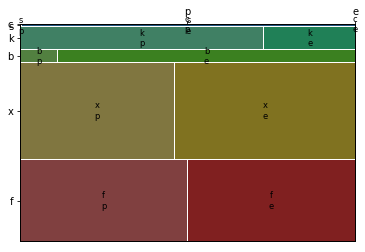

In [55]:

mosaic(train,['cap-shape','class'],horizontal=False)

### clearly, cap-shape has a significant effect on the traget variable

In [41]:
#### lets repeat the same exercise for each categorical variable to make a rough inference about its impact on target variable
train['cap-surface'].value_counts()

y    2295
s    1763
f    1624
g       4
Name: cap-surface, dtype: int64

In [42]:
pd.DataFrame(pd.crosstab(train['cap-surface'],train['class']))

class,e,p
cap-surface,,
f,1090,534
g,0,4
s,790,973
y,1065,1230


(<matplotlib.figure.Figure at 0x1d5c0ca0a90>,
 OrderedDict([(('s', 'p'),
               (0.0, 0.0, 0.55006661478188601, 0.30547763151739044)),
              (('s', 'e'),
               (0.55338887391809854,
                0.0,
                0.44661112608190129,
                0.30547763151739044)),
              (('y', 'p'),
               (0.0,
                0.31040373989177467,
                0.53416715523418667,
                0.39765806258219566)),
              (('y', 'e'),
               (0.53748941437039921,
                0.31040373989177467,
                0.46251058562960068,
                0.39765806258219566)),
              (('f', 'p'),
               (0.0,
                0.7129879108483546,
                0.32772531626925028,
                0.28139289482940566)),
              (('f', 'e'),
               (0.33104757540546292,
                0.7129879108483546,
                0.66895242459453708,
                0.28139289482940566)),
              (('g', '

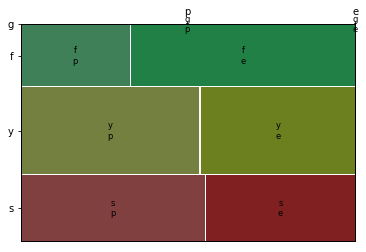

In [56]:
mosaic(train,['cap-surface','class'],horizontal=False)

##### rough surface of type 'f' is edible most of the times while type 'g' is always poisonous. Other two are almost neutral.

In [44]:
train['cap-color'].value_counts()

n    1600
g    1292
e    1050
y     756
w     720
b     112
p     104
c      32
u      12
r       8
Name: cap-color, dtype: int64

(<matplotlib.figure.Figure at 0x1d5c0bb9748>,
 OrderedDict([(('e', 'p'),
               (0.0, 0.0, 0.56668248694826773, 0.17671204519789224)),
              (('e', 'e'),
               (0.57000474608448026,
                0.0,
                0.42999525391551963,
                0.17671204519789224)),
              (('w', 'p'),
               (0.0,
                0.18149673419310758,
                0.30869324473975635,
                0.12117397384998327)),
              (('w', 'e'),
               (0.31201550387596899,
                0.18149673419310758,
                0.6879844961240309,
                0.12117397384998327)),
              (('n', 'p'),
               (0.0,
                0.30745539703830616,
                0.45348837209302323,
                0.2692754974444073)),
              (('n', 'e'),
               (0.45681063122923588,
                0.30745539703830616,
                0.54318936877076396,
                0.2692754974444073)),
              (('y', 'p

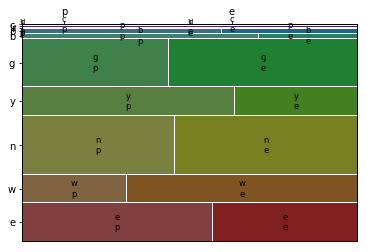

In [57]:
mosaic(train,['cap-color','class'],horizontal=False)

In [58]:
pd.DataFrame(pd.crosstab(train['cap-color'],train['class']))

class,e,p
cap-color,,
b,33,79
c,24,8
e,453,597
g,728,564
n,872,728
p,42,62
r,8,0
u,12,0
w,497,223


In [59]:
train.bruises.value_counts()

f    3298
t    2388
Name: bruises, dtype: int64

(<matplotlib.figure.Figure at 0x1d5c1140cf8>,
 OrderedDict([(('f', 'p'), (0.0, 0.0, 0.69326220058869858, 0.57713542733046)),
              (('f', 'e'),
               (0.69658445972491123,
                0.0,
                0.30341554027508871,
                0.57713542733046)),
              (('t', 'p'),
               (0.0,
                0.5821105517085694,
                0.18656404948329688,
                0.4178894482914307)),
              (('t', 'e'),
               (0.1898863086195095,
                0.5821105517085694,
                0.81011369138049039,
                0.4178894482914307))]))

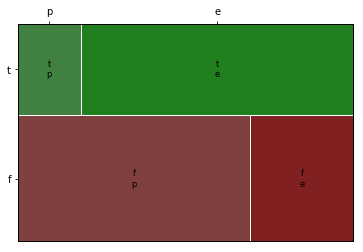

In [60]:
mosaic(train,['bruises','class'],horizontal=False)

type 'f' is dominantly poisonous while type type 't' is edible most of the times

In [67]:
train['odor'].value_counts()

n    2487
f    1501
s     411
y     398
l     280
a     270
p     188
c     127
m      24
Name: odor, dtype: int64

(<matplotlib.figure.Figure at 0x1d5c22a6a20>,
 OrderedDict([(('s', 'p'),
               (0.0, 0.0, 0.99667774086378735, 0.06950269217240726)),
              (('s', 'e'), (1.0, 0.0, 0.0, 0.06950269217240726)),
              (('p', 'p'),
               (0.0,
                0.07431038448009958,
                0.99667774086378735,
                0.031791985713899185)),
              (('p', 'e'),
               (1.0, 0.07431038448009958, 0.0, 0.031791985713899185)),
              (('n', 'p'),
               (0.0,
                0.11091006250169105,
                0.036869462066533347,
                0.4205673854812089)),
              (('n', 'e'),
               (0.040191721202745972,
                0.11091006250169105,
                0.95980827879725394,
                0.4205673854812089)),
              (('y', 'p'),
               (0.0,
                0.5362851402905923,
                0.99667774086378735,
                0.06730431018155253)),
              (('y', 'e'),
      

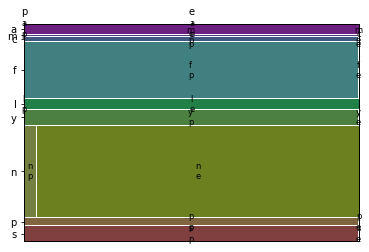

In [62]:
mosaic(train,['odor','class'],horizontal=False)

In [64]:
pd.crosstab(train['odor'],train['class'])

class,e,p
odor,,
a,270,0
c,0,127
f,0,1501
l,280,0
m,0,24
n,2395,92
p,0,188
s,0,411
y,0,398


In [68]:
train['gill-attachment'].value_counts()

f    5552
a     134
Name: gill-attachment, dtype: int64

In [69]:
pd.crosstab(train['gill-attachment'],train['class'])

class,e,p
gill-attachment,,
a,121,13
f,2824,2728


In [4]:
train['gill-spacing'].value_counts()

c    4769
w     917
Name: gill-spacing, dtype: int64

In [5]:
pd.crosstab(train['gill-spacing'],train['class'])

class,e,p
gill-spacing,,
c,2106,2663
w,839,78


(<matplotlib.figure.Figure at 0x15049a6a5f8>,
 OrderedDict([(('c', 'p'),
               (0.0, 0.0, 0.55654284418541944, 0.8345539275133305)),
              (('c', 'e'),
               (0.55986510332163208,
                0.0,
                0.4401348966783678,
                0.8345539275133305)),
              (('w', 'p'),
               (0.0,
                0.8395290518914399,
                0.084777386900082241,
                0.16047094810856025)),
              (('w', 'e'),
               (0.08809964603629486,
                0.8395290518914399,
                0.91190035396370506,
                0.16047094810856025))]))

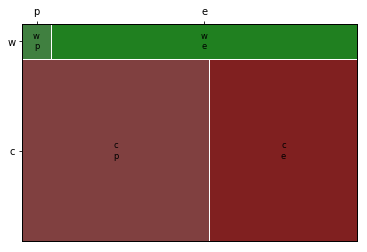

In [8]:
mosaic(train,['gill-spacing','class'],horizontal=False)

type 'w' is almost always edible although covers very small fraction of data.

In [9]:
train['gill-size'].value_counts()

b    3929
n    1757
Name: gill-size, dtype: int64

In [10]:
pd.crosstab(train['gill-size'],train['class'])

class,e,p
gill-size,,
b,2743,1186
n,202,1555


(<matplotlib.figure.Figure at 0x15049eec198>,
 OrderedDict([(('n', 'p'), (0.0, 0.0, 0.8820910000245813, 0.3074672364522796)),
              (('n', 'e'),
               (0.88541325916079383,
                0.0,
                0.11458674083920602,
                0.3074672364522796)),
              (('b', 'p'),
               (0.0,
                0.31244236083038907,
                0.30085512870054765,
                0.6875576391696111)),
              (('b', 'e'),
               (0.30417738783676029,
                0.31244236083038907,
                0.69582261216323971,
                0.6875576391696111))]))

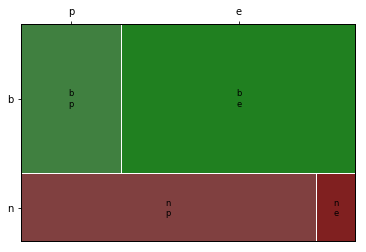

In [11]:
mosaic(train,['gill-size','class'],horizontal=False)

level 'b' is almost always edible while level 'n' is poisonous.

In [12]:
train['gill-color'].value_counts()

b    1200
p    1066
w     844
n     728
h     530
g     526
u     341
k     269
e      70
y      56
o      39
r      17
Name: gill-color, dtype: int64

(<matplotlib.figure.Figure at 0x1504a0544e0>,
 OrderedDict([(('b', 'p'),
               (0.0, 0.0, 0.99667774086378735, 0.2000423422957859)),
              (('b', 'e'), (1.0, 0.0, 0.0, 0.2000423422957859)),
              (('k', 'p'),
               (0.0,
                0.2047816787886769,
                0.18525608566241397,
                0.044842825064638686)),
              (('k', 'e'),
               (0.18857834479862659,
                0.2047816787886769,
                0.81142165520137333,
                0.044842825064638686)),
              (('e', 'p'),
               (0.0, 0.25436384034620657, 0.0, 0.011669136633920855)),
              (('e', 'e'),
               (0.0033222591362126247,
                0.25436384034620657,
                0.99667774086378735,
                0.011669136633920855)),
              (('n', 'p'),
               (0.0,
                0.27077231347301844,
                0.11363221496111862,
                0.12135902099277678)),
              ((

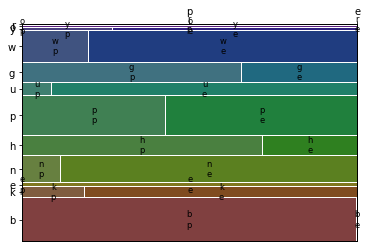

In [13]:
mosaic(train,['gill-color','class'],horizontal=False)

In [14]:
pd.crosstab(train['gill-color'],train['class'])

class,e,p
gill-color,,
b,0,1200
e,70,0
g,182,344
h,149,381
k,219,50
n,645,83
o,39,0
p,610,456
r,0,17


In [15]:
train['stalk-shape'].value_counts()

t    3224
e    2462
Name: stalk-shape, dtype: int64

(<matplotlib.figure.Figure at 0x1504a373ef0>,
 OrderedDict([(('t', 'p'),
               (0.0, 0.0, 0.43249136459939153, 0.5641857543097037)),
              (('t', 'e'),
               (0.43581362373560417,
                0.0,
                0.56418637626439572,
                0.5641857543097037)),
              (('e', 'p'),
               (0.0,
                0.5691608786878133,
                0.54327438190056965,
                0.4308391213121869)),
              (('e', 'e'),
               (0.54659664103678229,
                0.5691608786878133,
                0.4534033589632176,
                0.4308391213121869))]))

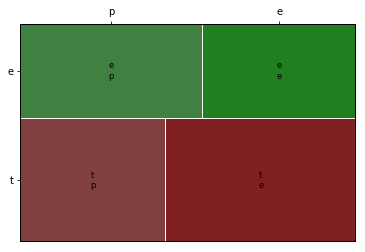

In [16]:
mosaic(train,['stalk-shape','class'],horizontal=False)

In [17]:
pd.crosstab(train['stalk-shape'],train['class'])

class,e,p
stalk-shape,,
e,1120,1342
t,1825,1399


In [19]:
train['stalk-root'].value_counts()

b    2665
?    1727
e     780
c     382
r     132
Name: stalk-root, dtype: int64

In [20]:
pd.crosstab(train['stalk-root'],train['class'])

class,e,p
stalk-root,,
?,503,1224
b,1368,1297
c,350,32
e,592,188
r,132,0


(<matplotlib.figure.Figure at 0x1504a4e8ef0>,
 OrderedDict([(('?', 'p'),
               (0.0, 0.0, 0.7063888562925742, 0.29777299593773493)),
              (('?', 'e'),
               (0.70971111542878684,
                0.0,
                0.2902888845712131,
                0.29777299593773493)),
              (('e', 'p'),
               (0.0,
                0.30267495672204864,
                0.24022489138768208,
                0.13448925120523064)),
              (('e', 'e'),
               (0.2435471505238947,
                0.30267495672204864,
                0.75645284947610525,
                0.13448925120523064)),
              (('c', 'p'),
               (0.0,
                0.442066168711593,
                0.083491329077594753,
                0.06586524866717702)),
              (('c', 'e'),
               (0.086813588213807372,
                0.442066168711593,
                0.91318641178619253,
                0.06586524866717702)),
              (('b', 'p')

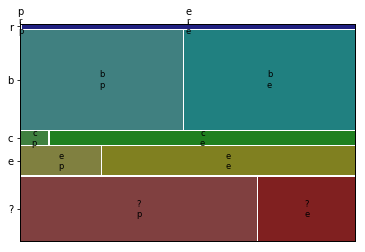

In [21]:
mosaic(train,['stalk-root','class'],horizontal=False)

In [22]:
train['stalk-surface-above-ring'].value_counts()

s    3624
k    1661
f     380
y      21
Name: stalk-surface-above-ring, dtype: int64

In [23]:
pd.crosstab(train['stalk-surface-above-ring'],train['class'])

class,e,p
stalk-surface-above-ring,,
f,278,102
k,101,1560
s,2553,1071
y,13,8


(<matplotlib.figure.Figure at 0x1504a6bba90>,
 OrderedDict([(('s', 'p'),
               (0.0, 0.0, 0.29454797474202982, 0.6279358687572448)),
              (('s', 'e'),
               (0.29787023387824246,
                0.0,
                0.70212976612175737,
                0.6279358687572448)),
              (('k', 'p'),
               (0.0,
                0.6328619771316291,
                0.93607301369506812,
                0.28780393984707053)),
              (('k', 'e'),
               (0.93939527283128077,
                0.6328619771316291,
                0.060604727168719161,
                0.28780393984707053)),
              (('f', 'p'),
               (0.0,
                0.9255920253530838,
                0.26752928833712186,
                0.06584316504628951)),
              (('f', 'e'),
               (0.27085154747333451,
                0.9255920253530838,
                0.72914845252666549,
                0.06584316504628951)),
              (('y', 'p')

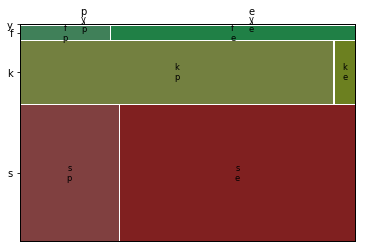

In [24]:
mosaic(train,['stalk-surface-above-ring','class'],horizontal=False)

In [25]:
train['stalk-surface-below-ring'].value_counts()

s    3463
k    1614
f     408
y     201
Name: stalk-surface-below-ring, dtype: int64

In [26]:
pd.crosstab(train['stalk-surface-below-ring'],train['class'])

class,e,p
stalk-surface-below-ring,,
f,308,100
k,104,1510
s,2388,1075
y,145,56


(<matplotlib.figure.Figure at 0x1504a943860>,
 OrderedDict([(('s', 'p'),
               (0.0, 0.0, 0.29454797474202982, 0.6279358687572448)),
              (('s', 'e'),
               (0.29787023387824246,
                0.0,
                0.70212976612175737,
                0.6279358687572448)),
              (('k', 'p'),
               (0.0,
                0.6328619771316291,
                0.93607301369506812,
                0.28780393984707053)),
              (('k', 'e'),
               (0.93939527283128077,
                0.6328619771316291,
                0.060604727168719161,
                0.28780393984707053)),
              (('f', 'p'),
               (0.0,
                0.9255920253530838,
                0.26752928833712186,
                0.06584316504628951)),
              (('f', 'e'),
               (0.27085154747333451,
                0.9255920253530838,
                0.72914845252666549,
                0.06584316504628951)),
              (('y', 'p')

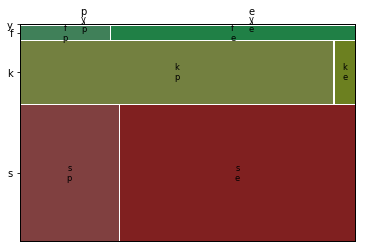

In [27]:
mosaic(train,['stalk-surface-above-ring','class'],horizontal=False)

In [28]:
train['stalk-color-below-ring'].value_counts()

w    3075
p    1284
g     424
n     355
b     313
o     121
e      69
c      24
y      21
Name: stalk-color-below-ring, dtype: int64

In [29]:
pd.crosstab(train['stalk-color-below-ring'],train['class'])

class,e,p
stalk-color-below-ring,,
b,0,313
c,0,24
e,69,0
g,424,0
n,48,307
o,121,0
p,397,887
w,1886,1189
y,0,21


(<matplotlib.figure.Figure at 0x1504bbb8eb8>,
 OrderedDict([(('w', 'p'),
               (0.0, 0.0, 0.38538205980066442, 0.5200018939906383)),
              (('w', 'e'),
               (0.38870431893687707,
                0.0,
                0.61129568106312282,
                0.5200018939906383)),
              (('e', 'p'),
               (0.0, 0.5248095862983306, 0.0, 0.011668335182228914)),
              (('e', 'e'),
               (0.0033222591362126247,
                0.5248095862983306,
                0.99667774086378735,
                0.011668335182228914)),
              (('n', 'p'),
               (0.0,
                0.5412856137882518,
                0.86191568012727515,
                0.06003273898103302)),
              (('n', 'e'),
               (0.8652379392634878,
                0.5412856137882518,
                0.13476206073651212,
                0.06003273898103302)),
              (('p', 'p'),
               (0.0,
                0.6061260450769772,
   

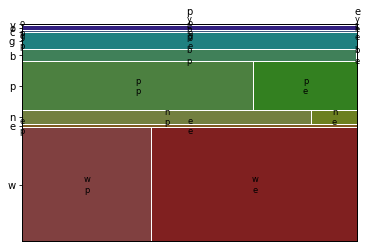

In [31]:
mosaic(train,['stalk-color-below-ring','class'],horizontal=False)

In [32]:
train['veil-type'].value_counts()

p    5686
Name: veil-type, dtype: int64

#### There is no point in keeping this variable in dataset or analyzing it because it has got only one level. So,it is drop the variable from training and test set right now.

In [52]:
train.drop('veil-type',axis=1,inplace=True)
test.drop('veil-type',axis=1,inplace=True)

In [33]:
train['veil-color'].value_counts()

w    5557
n      70
o      51
y       8
Name: veil-color, dtype: int64

In [34]:
pd.crosstab(train['veil-color'],train['class'])

class,e,p
veil-color,,
n,70,0
o,51,0
w,2824,2733
y,0,8


(<matplotlib.figure.Figure at 0x1504bd7bc50>,
 OrderedDict([(('w', 'p'), (0.0, 0.0, 0.4901782015081394, 0.9628696530585017)),
              (('w', 'e'),
               (0.49350046064435205,
                0.0,
                0.50649953935564795,
                0.9628696530585017)),
              (('o', 'p'),
               (0.0, 0.9677957614328859, 0.0, 0.008836845835159902)),
              (('o', 'e'),
               (0.0033222591362126247,
                0.9677957614328859,
                0.99667774086378735,
                0.008836845835159902)),
              (('n', 'p'),
               (0.0, 0.9815587156424301, 0.0, 0.012129004087474443)),
              (('n', 'e'),
               (0.0033222591362126247,
                0.9815587156424301,
                0.99667774086378735,
                0.012129004087474443)),
              (('y', 'p'),
               (0.0,
                0.9986138281042887,
                0.99667774086378735,
                0.00138617189571134)),
  

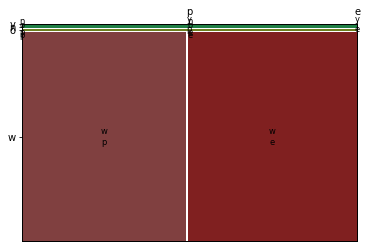

In [35]:
mosaic(train,['veil-color','class'],horizontal=False)

In [36]:
train['ring-number'].value_counts()

o    5227
t     435
n      24
Name: ring-number, dtype: int64

In [37]:
pd.crosstab(train['ring-number'],train['class'])

class,e,p
ring-number,,
n,0,24
o,2562,2665
t,383,52


(<matplotlib.figure.Figure at 0x1504be3c518>,
 OrderedDict([(('o', 'p'),
               (0.0, 0.0, 0.50815882521560995, 0.9101736765305092)),
              (('o', 'e'),
               (0.51148108435182249,
                0.0,
                0.4885189156481774,
                0.9101736765305092)),
              (('t', 'p'),
               (0.0,
                0.9151241715800141,
                0.11914308626417687,
                0.07574623097202442)),
              (('t', 'e'),
               (0.12246534540038949,
                0.9151241715800141,
                0.87753465459961044,
                0.07574623097202442)),
              (('n', 'p'),
               (0.0,
                0.9958208976015436,
                0.99667774086378735,
                0.004179102398456465)),
              (('n', 'e'),
               (1.0, 0.9958208976015436, 0.0, 0.004179102398456465))]))

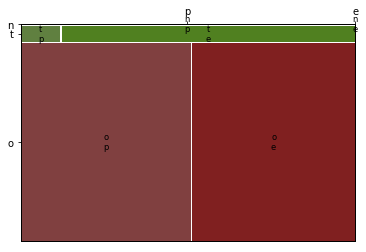

In [38]:
mosaic(train,['ring-number','class'],horizontal=False)

In [39]:
train['ring-type'].value_counts()

p    2788
e    1931
l     911
f      32
n      24
Name: ring-type, dtype: int64

In [40]:
pd.crosstab(train['ring-type'],train['class'])

class,e,p
ring-type,,
e,699,1232
f,32,0
l,0,911
n,0,24
p,2214,574


(<matplotlib.figure.Figure at 0x1504c074f60>,
 OrderedDict([(('e', 'p'),
               (0.0, 0.0, 0.63589175388098707, 0.33294710779141057)),
              (('e', 'e'),
               (0.6392140130171996,
                0.0,
                0.36078598698280023,
                0.33294710779141057)),
              (('p', 'p'),
               (0.0,
                0.33784906857572433,
                0.20519835841313266,
                0.48071286200023455)),
              (('p', 'e'),
               (0.20852061754934528,
                0.33784906857572433,
                0.79147938245065463,
                0.48071286200023455)),
              (('l', 'p'),
               (0.0,
                0.8234638913602726,
                0.99667774086378735,
                0.15707654852303213)),
              (('l', 'e'),
               (1.0, 0.8234638913602726, 0.0, 0.15707654852303213)),
              (('f', 'p'),
               (0.0, 0.9854424006676185, 0.0, 0.005517507741753089)),
      

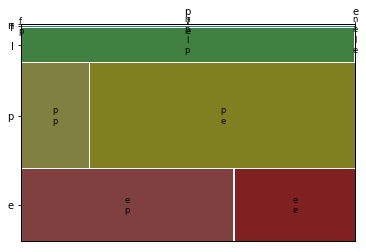

In [41]:
mosaic(train,['ring-type','class'],horizontal=False)

In [42]:
train['spore-print-color'].value_counts()

w    1682
n    1401
k    1284
h    1142
r      52
u      35
b      32
y      32
o      26
Name: spore-print-color, dtype: int64

In [43]:
pd.crosstab(train['spore-print-color'],train['class'])

class,e,p
spore-print-color,,
b,32,0
h,32,1110
k,1124,160
n,1246,155
o,26,0
r,0,52
u,35,0
w,418,1264
y,32,0


(<matplotlib.figure.Figure at 0x1504c117e48>,
 OrderedDict([(('w', 'p'),
               (0.0, 0.0, 0.74898969349097932, 0.2844368083552044)),
              (('w', 'e'),
               (0.75231195262719197,
                0.0,
                0.24768804737280797,
                0.2844368083552044)),
              (('n', 'p'),
               (0.0,
                0.2892445006628967,
                0.11026770152311707,
                0.2369179360913445)),
              (('n', 'e'),
               (0.11358996065932969,
                0.2892445006628967,
                0.8864100393406702,
                0.2369179360913445)),
              (('h', 'p'),
               (0.0,
                0.5309701290619335,
                0.96874981817758665,
                0.19311940258123866)),
              (('h', 'e'),
               (0.97207207731379919,
                0.5309701290619335,
                0.027927922686200694,
                0.19311940258123866)),
              (('k', 'p'),
 

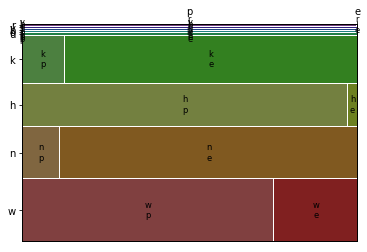

In [44]:
mosaic(train,['spore-print-color','class'],horizontal=False)

In [45]:
train['population'].value_counts()

v    2814
y    1219
s     877
n     279
a     255
c     242
Name: population, dtype: int64

In [46]:
pd.crosstab(train['population'],train['class'])

class,e,p
population,,
a,255,0
c,202,40
n,279,0
s,616,261
v,841,1973
y,752,467


(<matplotlib.figure.Figure at 0x1504c3e1e48>,
 OrderedDict([(('v', 'p'),
               (0.0, 0.0, 0.69880781191338037, 0.48282902807923617)),
              (('v', 'e'),
               (0.70213007104959302,
                0.0,
                0.29786992895040693,
                0.48282902807923617)),
              (('c', 'p'),
               (0.0,
                0.487707076859724,
                0.16474012245682434,
                0.04152261009068054)),
              (('c', 'e'),
               (0.16806238159303696,
                0.487707076859724,
                0.8319376184069629,
                0.04152261009068054)),
              (('s', 'p'),
               (0.0,
                0.5341077357308923,
                0.29661675070176569,
                0.150476566320359)),
              (('s', 'e'),
               (0.29993900983797833,
                0.5341077357308923,
                0.70006099016202161,
                0.150476566320359)),
              (('y', 'p'),
    

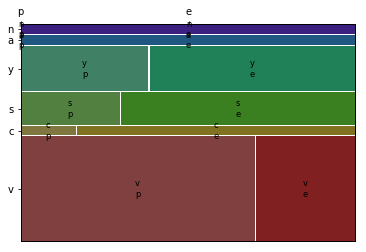

In [47]:
mosaic(train,['population','class'],horizontal=False)

In [48]:
train['habitat'].value_counts()

d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64

In [49]:
pd.crosstab(train['habitat'],train['class'])

class,e,p
habitat,,
d,1338,889
g,975,525
l,156,412
m,175,23
p,95,703
u,67,189
w,139,0


(<matplotlib.figure.Figure at 0x1504c3e7278>,
 OrderedDict([(('l', 'p'),
               (0.0, 0.0, 0.72294230499274714, 0.09698492977129997)),
              (('l', 'e'),
               (0.72626456412895979,
                0.0,
                0.27373543587104016,
                0.09698492977129997)),
              (('u', 'p'),
               (0.0,
                0.10183929870333881,
                0.73582848837209291,
                0.0437115176434028)),
              (('u', 'e'),
               (0.73915074750830556,
                0.10183929870333881,
                0.26084925249169433,
                0.0437115176434028)),
              (('w', 'p'),
               (0.0, 0.15040518527878044, 0.0, 0.02373398809544136)),
              (('w', 'e'),
               (0.0033222591362126247,
                0.15040518527878044,
                0.99667774086378735,
                0.02373398809544136)),
              (('m', 'p'),
               (0.0,
                0.17899354230626063,

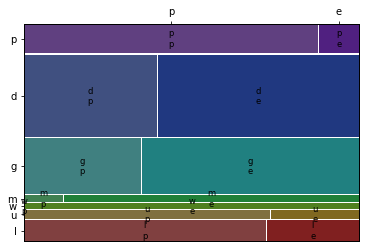

In [50]:
mosaic(train,['habitat','class'],horizontal=False)

#### Next I will analyze continuous variables.

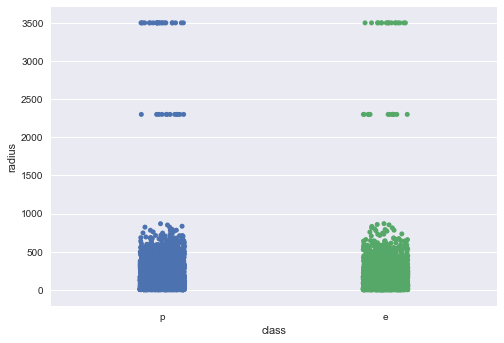

In [4]:
sns.stripplot(x='class',y='radius',data=train,jitter=True)

From the plot, it is clear that in case of extremely large values of radius, only two values exist which gives red signal. This observation should be thoroughly examined. Let's what are those two values.

In [5]:
train[train.radius>1000]['radius']

64      3500
249     3500
294     3500
426     2300
558     2300
566     2300
569     3500
661     3500
704     3500
923     3500
1030    2300
1047    2300
1161    2300
1199    2300
1410    3500
1472    2300
1697    3500
1750    3500
1831    3500
1876    3500
1965    3500
1989    3500
2169    3500
2193    3500
2490    2300
2499    3500
2608    3500
2662    3500
2732    3500
2741    3500
        ... 
3348    3500
3354    2300
3421    3500
3430    3500
3474    3500
3661    3500
4017    3500
4131    2300
4146    3500
4159    2300
4221    2300
4269    2300
4295    2300
4308    2300
4335    2300
4498    3500
4664    3500
4716    2300
4823    2300
4979    2300
5000    3500
5067    3500
5173    3500
5421    3500
5474    2300
5490    3500
5568    2300
5583    3500
5625    3500
5654    3500
Name: radius, Length: 65, dtype: int64

It's 3500 and 2300. Now I am sure that this is due to some mistake in data collection or data record keeping. I have to impute these values. I will keep things simple and impute with mean. 

In [11]:
train.loc[train.radius>1000,'radius'] = train.loc[train.radius>1000].mean()

Let me crooscheck whether everything is fine or not.

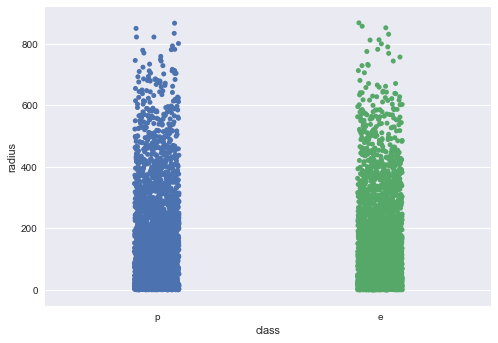

In [12]:
sns.stripplot(x='class',y='radius',data=train,jitter=True)

Next, lets proceed with weight in the same manner.

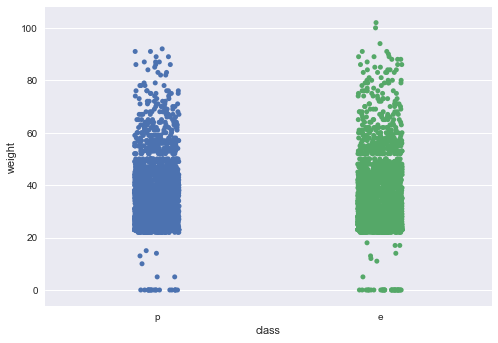

In [13]:
sns.stripplot(x='class',y='weight',data=train,jitter=True)

In [14]:
train.weight[train.weight==0].shape

(51,)

Weight of mushroom = 0 indicates mistakes in the data and needs to be imputed with suitable values.

In [15]:
train.loc[train.weight==0,'weight'] = train.loc[train.weight != 0].mean()

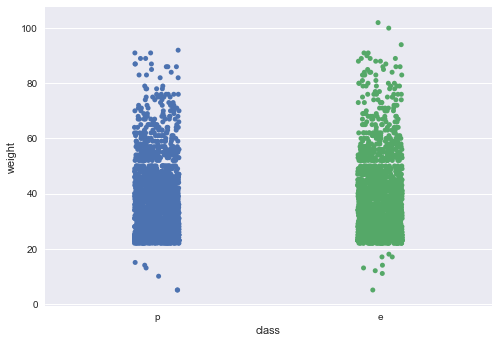

In [16]:
sns.stripplot(x='class',y='weight',data=train,jitter=True)